In [130]:
import pandas as pd
import numpy as np
import altair as alt

In [131]:
PATH = "tests/data/sgresult.csv"

In [132]:
df = pd.read_csv(PATH)

In [133]:
df.head()

,is_with_subtitle,is_free,is_iap,log_size,cur_release_duration,title_end_with_number,min_iap,mediumn_iap,max_iap,n_iap,...,age_rating_12+,age_rating_17+,age_rating_4+,age_rating_9+,"price_zone_(-0.001, 0.01]","price_zone_(0.01, 4.99]","price_zone_(4.99, 9.99]","price_zone_(9.99, inf]",target,target_predict
0,False,True,True,4.942612,22,False,0.99,3.49,19.99,10.0,...,0,0,1,0,1,0,0,0,True,True
1,True,True,False,3.867035,8,False,0.00,0.00,0.00,0.0,...,0,0,1,0,1,0,0,0,True,False
2,True,True,True,4.400363,28,False,0.99,4.99,49.99,7.0,...,0,0,1,0,1,0,0,0,False,True
3,False,True,True,5.253536,7,False,3.99,7.49,24.99,10.0,...,0,0,0,1,1,0,0,0,True,True
4,True,True,True,6.273240,22,False,4.99,24.99,99.99,6.0,...,1,0,0,0,1,0,0,0,False,True


In [134]:
alt.Chart(df).mark_circle().encode(
    alt.X("target:O"),
    alt.Y("target_predict:O", sort='descending'),
    size="count()"
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [135]:
pd.crosstab(df["target"], df["target_predict"])

target_predict,False,True
target,,
False,106,133
True,24,316


In [136]:
k = df.groupby("target")["target"].count()
k/k.sum()

target
False    0.412781
True     0.587219
Name: target, dtype: float64

In [137]:
gridSeachScore =[(10, [0.6791705349889752, 0.524691413379472]), (30, [0.7054074036235761, 0.5641382110105309]), (50, [0.7116396727271376, 0.5859909074350119]), (80, [0.7381291929044738, 0.6017332386714409]), (100, [0.748965822232581, 0.6151454303147654]), (150, [0.7585513078470825, 0.6334004024144869]), (200, [0.7684099586382438, 0.6479249522748967]), (500, [0.7969312793797441, 0.6807146781709773]), (1000, [0.8379805265055896, 0.7209520375045078]), (2000, [0.8504633589962932, 0.7368406045052753]), (3000, [0.8514757219930182, 0.7350893896117634])]

In [138]:

gridsSearchDf = pd.DataFrame([(minCount,a,a-b) for minCount,(a,b) in gridSeachScore],columns=["minCount","score","lift"])
gridsSearchDf

,minCount,score,lift
0,10,0.679171,0.154479
1,30,0.705407,0.141269
2,50,0.711640,0.125649
3,80,0.738129,0.136396
4,100,0.748966,0.133820
5,150,0.758551,0.125151
6,200,0.768410,0.120485
7,500,0.796931,0.116217
8,1000,0.837981,0.117028
9,2000,0.850463,0.113623


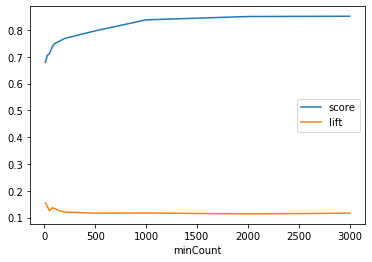

In [139]:
gridsSearchDf.set_index("minCount").plot()